In [83]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [90]:
class FuzzyEntropy():
    def __init__(self):
        pass
    def calc_alpha(self,s,d_dash):
        # numerator, denominator = (12.43).as_integer_ratio()
        # (numerator,denominator)

        alpha = -(np.log(s))/d_dash
        return alpha
    def Ecledian_distance(self,samples):
        distances = []
        for i in samples:
            subdistance = []
            for j in samples:
                distance = np.sqrt(((i - j)**2).sum())
                subdistance.append(distance)
            distances.append(subdistance)
        return np.array(distances)
    
    def similarities(self,distances,alpha):
        similarities = np.exp(- distances* alpha)
        return np.array(similarities)
    
    def entropies(self,similarities):
        entropies = []
        for i in range(len(similarities)):
            i_entropy=0
            for j in range(len(similarities[i])):
                if i!=j:
                    i_entropy += (similarities[i][j]*np.log2(similarities[i][j]))+((1-similarities[i][j])*np.log2(1-similarities[i][j]))
            entropies.append(-i_entropy)
        return np.array(entropies)
    def get_next_entropy(self,sampels,entropies):
        sorted_indices = np.argsort(entropies)
        for i in range(len(sorted_indices)):
            if not sampels[sorted_indices[i]][1]:
                return sorted_indices[i]
            
    
    def fit(self,sampels,s=0.5):
        distance =self.Ecledian_distance(sampels)
        print("distances: \n",distance)
        d_dash = distance.mean()
        print("d_dash: ",d_dash)
        alpha = self.calc_alpha(s,d_dash)
        print("alpha: ",alpha)
        similarities = self.similarities(distance,alpha)
        print("similarities:\n",similarities)
        entropies = self.entropies(similarities)
        print("entropies:\n",entropies)
        selected_entropy = np.argmin(entropies)
        print("Minimum entropy index: ",selected_entropy," with: ",entropies[0])
        i= 0
        sampels=[[t, False] for t in sampels]
        dictainary= {}
        
        while True:
            class_name = "class "+str(i)

            i= i+1
            dictainary[class_name] ={
                "class_centroid": sampels[selected_entropy][0]
            }
            sampels[selected_entropy][1]= True
            data = []
            for similarity_i in range(len(similarities[selected_entropy])):
                similarity = similarities[selected_entropy][similarity_i]
                if similarity>= s and not sampels[similarity_i][1]:
                    data.append(sampels[similarity_i][0])
                    sampels[similarity_i][1]=True
            
            dictainary[class_name]["data"]= data
            selected_entropy = self.get_next_entropy(sampels,entropies)
            finished= True

            for t in sampels:
                if not t[1]:
                   finished= False
                   break

            if finished: 
                print("im done")
                break
        return dictainary
            


In [85]:
data= np.array([[0.2,0.4,0.6],
       [0.4,0.3,0.8],
       [0.8,0.2,0.5],
       [0.9,0.5,0.4],
       [0.6,0.6,0.6],
       [0.3,0.4,0.5],
       [0.7,0.6,0.5],
       [0.2,0.5,0.3],
       [0.3,0.6,0.8],
       [0.8,0.3,0.1]])

In [86]:
data = np.random.normal(10,1, size=(50,2))
data = np.append(data, np.random.normal(5,1, size=(50,2)),axis=0)
len(data)

100

In [87]:
model = FuzzyEntropy()
X = model.fit(data,0.5)

distances: 
 [[0.         2.48116864 0.5219668  ... 8.7083     7.28176998 8.04150505]
 [2.48116864 0.         2.91130651 ... 6.85567668 5.16282155 6.27968839]
 [0.5219668  2.91130651 0.         ... 8.86881064 7.52830394 8.1841668 ]
 ...
 [8.7083     6.85567668 8.86881064 ... 0.         2.00076162 0.74030017]
 [7.28176998 5.16282155 7.52830394 ... 2.00076162 0.         1.8081448 ]
 [8.04150505 6.27968839 8.1841668  ... 0.74030017 1.8081448  0.        ]]
d_dash:  4.397030989053982
alpha:  0.15763982157175457
similarities:
 [[1.         0.67629157 0.9210115  ... 0.25340283 0.31730338 0.28148914]
 [0.67629157 1.         0.63195453 ... 0.33934851 0.44314145 0.37160309]
 [0.9210115  0.63195453 1.         ... 0.24707145 0.30520839 0.27522933]
 ...
 [0.25340283 0.33934851 0.24707145 ... 1.         0.72949723 0.88985141]
 [0.31730338 0.44314145 0.30520839 ... 0.72949723 1.         0.75198747]
 [0.28148914 0.37160309 0.27522933 ... 0.88985141 0.75198747 1.        ]]
entropies:
 [75.23141294 89.6

In [88]:
X

{'class 0': {'class_centroid': array([10.35116642,  9.93409956]),
  'data': [array([10.18144884, 10.29717845]),
   array([9.63718957, 7.87643897]),
   array([ 9.95991795, 10.76980241]),
   array([10.09298103,  9.98723032]),
   array([10.614839 ,  9.8104757]),
   array([10.95163862,  9.622058  ]),
   array([8.95935143, 9.18536337]),
   array([10.05256108, 10.09305609]),
   array([10.42480878, 10.60393229]),
   array([11.99593972,  9.19853538]),
   array([8.93077267, 8.9016578 ]),
   array([ 7.88144328, 10.26458425]),
   array([8.31065097, 9.18613433]),
   array([ 8.67518074, 10.09883529]),
   array([9.8464414 , 8.66082159]),
   array([11.07280584,  9.22703604]),
   array([11.17528123,  8.28742896]),
   array([8.82461995, 9.09269141]),
   array([10.62962445,  9.42080276]),
   array([10.66336062,  9.52907597]),
   array([ 9.7576735 , 10.19984732]),
   array([8.93032435, 8.94985267]),
   array([11.05516406,  8.69526191]),
   array([ 9.00718122, 10.50075239]),
   array([10.09969572,  9.1980

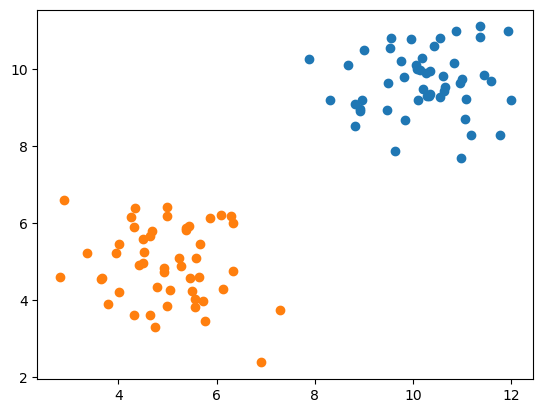

In [89]:
for data_i in X.values():
    final_data=[data_i["class_centroid"]]
    final_data.extend(data_i["data"])
    final_data= np.array(final_data)
    plt.scatter(final_data[:,0],final_data[:,1])
plt.show()